supp figure 2

In [ ]:
import pickle
from collections import defaultdict

net_dict_29 = {
    'Fp1': [0], 'Fp2': [1], 'Fz': [2], 'F3': [3], 'F4': [4], 'F7': [5], 'F8': [6], 'FCz': [7], 'FC3': [8],
    'FC4': [9], 'FT7': [10], 'FT8': [11], 'Cz': [12], 'C3': [13], 'C4': [14], 'T3': [15], 'T4': [16], 'CP3': [17],
	'CP4': [18], 'TP7': [19], 'TP8': [20],	'Pz': [21],	'P3': [22],	'P4': [23],	'T5': [24],	'T6': [25],	'Oz': [26],	
	'O1': [27],	'O2': [28]	
}

net_dict = {
    'Forehead': list(range(0, 2)), 
    'Frontal': list(range(2,12)), 
    'Center': [12, 13, 14, 17, 18], 
    'Temporal': [15,16,19,20,24,25],
    'Parietal': [21, 22, 23],
    'Occipital':[26 ,27, 28]
}

COLOR_SCHEME = {                  
    'Forehead': '#2ca02c',   
    'Frontal': '#d62728',   
    'Center': '#1f77b4',    
    'Temporal': '#9467bd',  
    'Parietal': '#ff7f0e',  
    'Occipital': '#17becf'   
}

channel_colors = defaultdict(list)
for region, channels in net_dict.items():
    for channel_name, channel_idx in net_dict_29.items():
        if channel_idx[0] in channels:
            channel_colors.setdefault(channel_name, COLOR_SCHEME[region])
channel_colors = dict(channel_colors)

region_colors = defaultdict(list)
for region, _ in net_dict.items():
    if region in COLOR_SCHEME:    
        region_colors.setdefault(region, COLOR_SCHEME[region])
region_colors = dict(region_colors)

load_path = '../dataset/window_lengths_across_seeds/spatial_list.pkl'
with open(load_path, 'rb') as f:
    spatial_list = pickle.load(f)
    
spatial_regions_list_channel = []    
for i in range(len(spatial_list)):
    spatial_regions = {}
    for region, channels in net_dict_29.items():
        if region not in spatial_regions.keys():
            spatial_regions[region] = []
            
        for spatial_max_weights in spatial_list[i]:
            spatial_max_weights_np = spatial_max_weights.squeeze(0).squeeze(1)
            spatial_max_weights_abs = abs(spatial_max_weights_np)

            channel_weights = [spatial_max_weights_abs[channel] for channel in channels]
            if channel_weights:  
                for weight in channel_weights:
                    spatial_regions[region].append(weight)
    spatial_regions_list_channel.append(spatial_regions)

spatial_regions_list_region = []    
for i in range(len(spatial_list)):
    spatial_regions = {}
    for region, channels in net_dict.items():
        if region not in spatial_regions.keys():
            spatial_regions[region] = []
            
        for spatial_max_weights in spatial_list[i]:
            spatial_max_weights_np = spatial_max_weights.squeeze(0).squeeze(1)
            spatial_max_weights_abs = abs(spatial_max_weights_np)

            channel_weights = [spatial_max_weights_abs[channel] for channel in channels]
            if channel_weights:  
                for weight in channel_weights:
                    spatial_regions[region].append(weight)
    spatial_regions_list_region.append(spatial_regions)

supp figure 2A-D

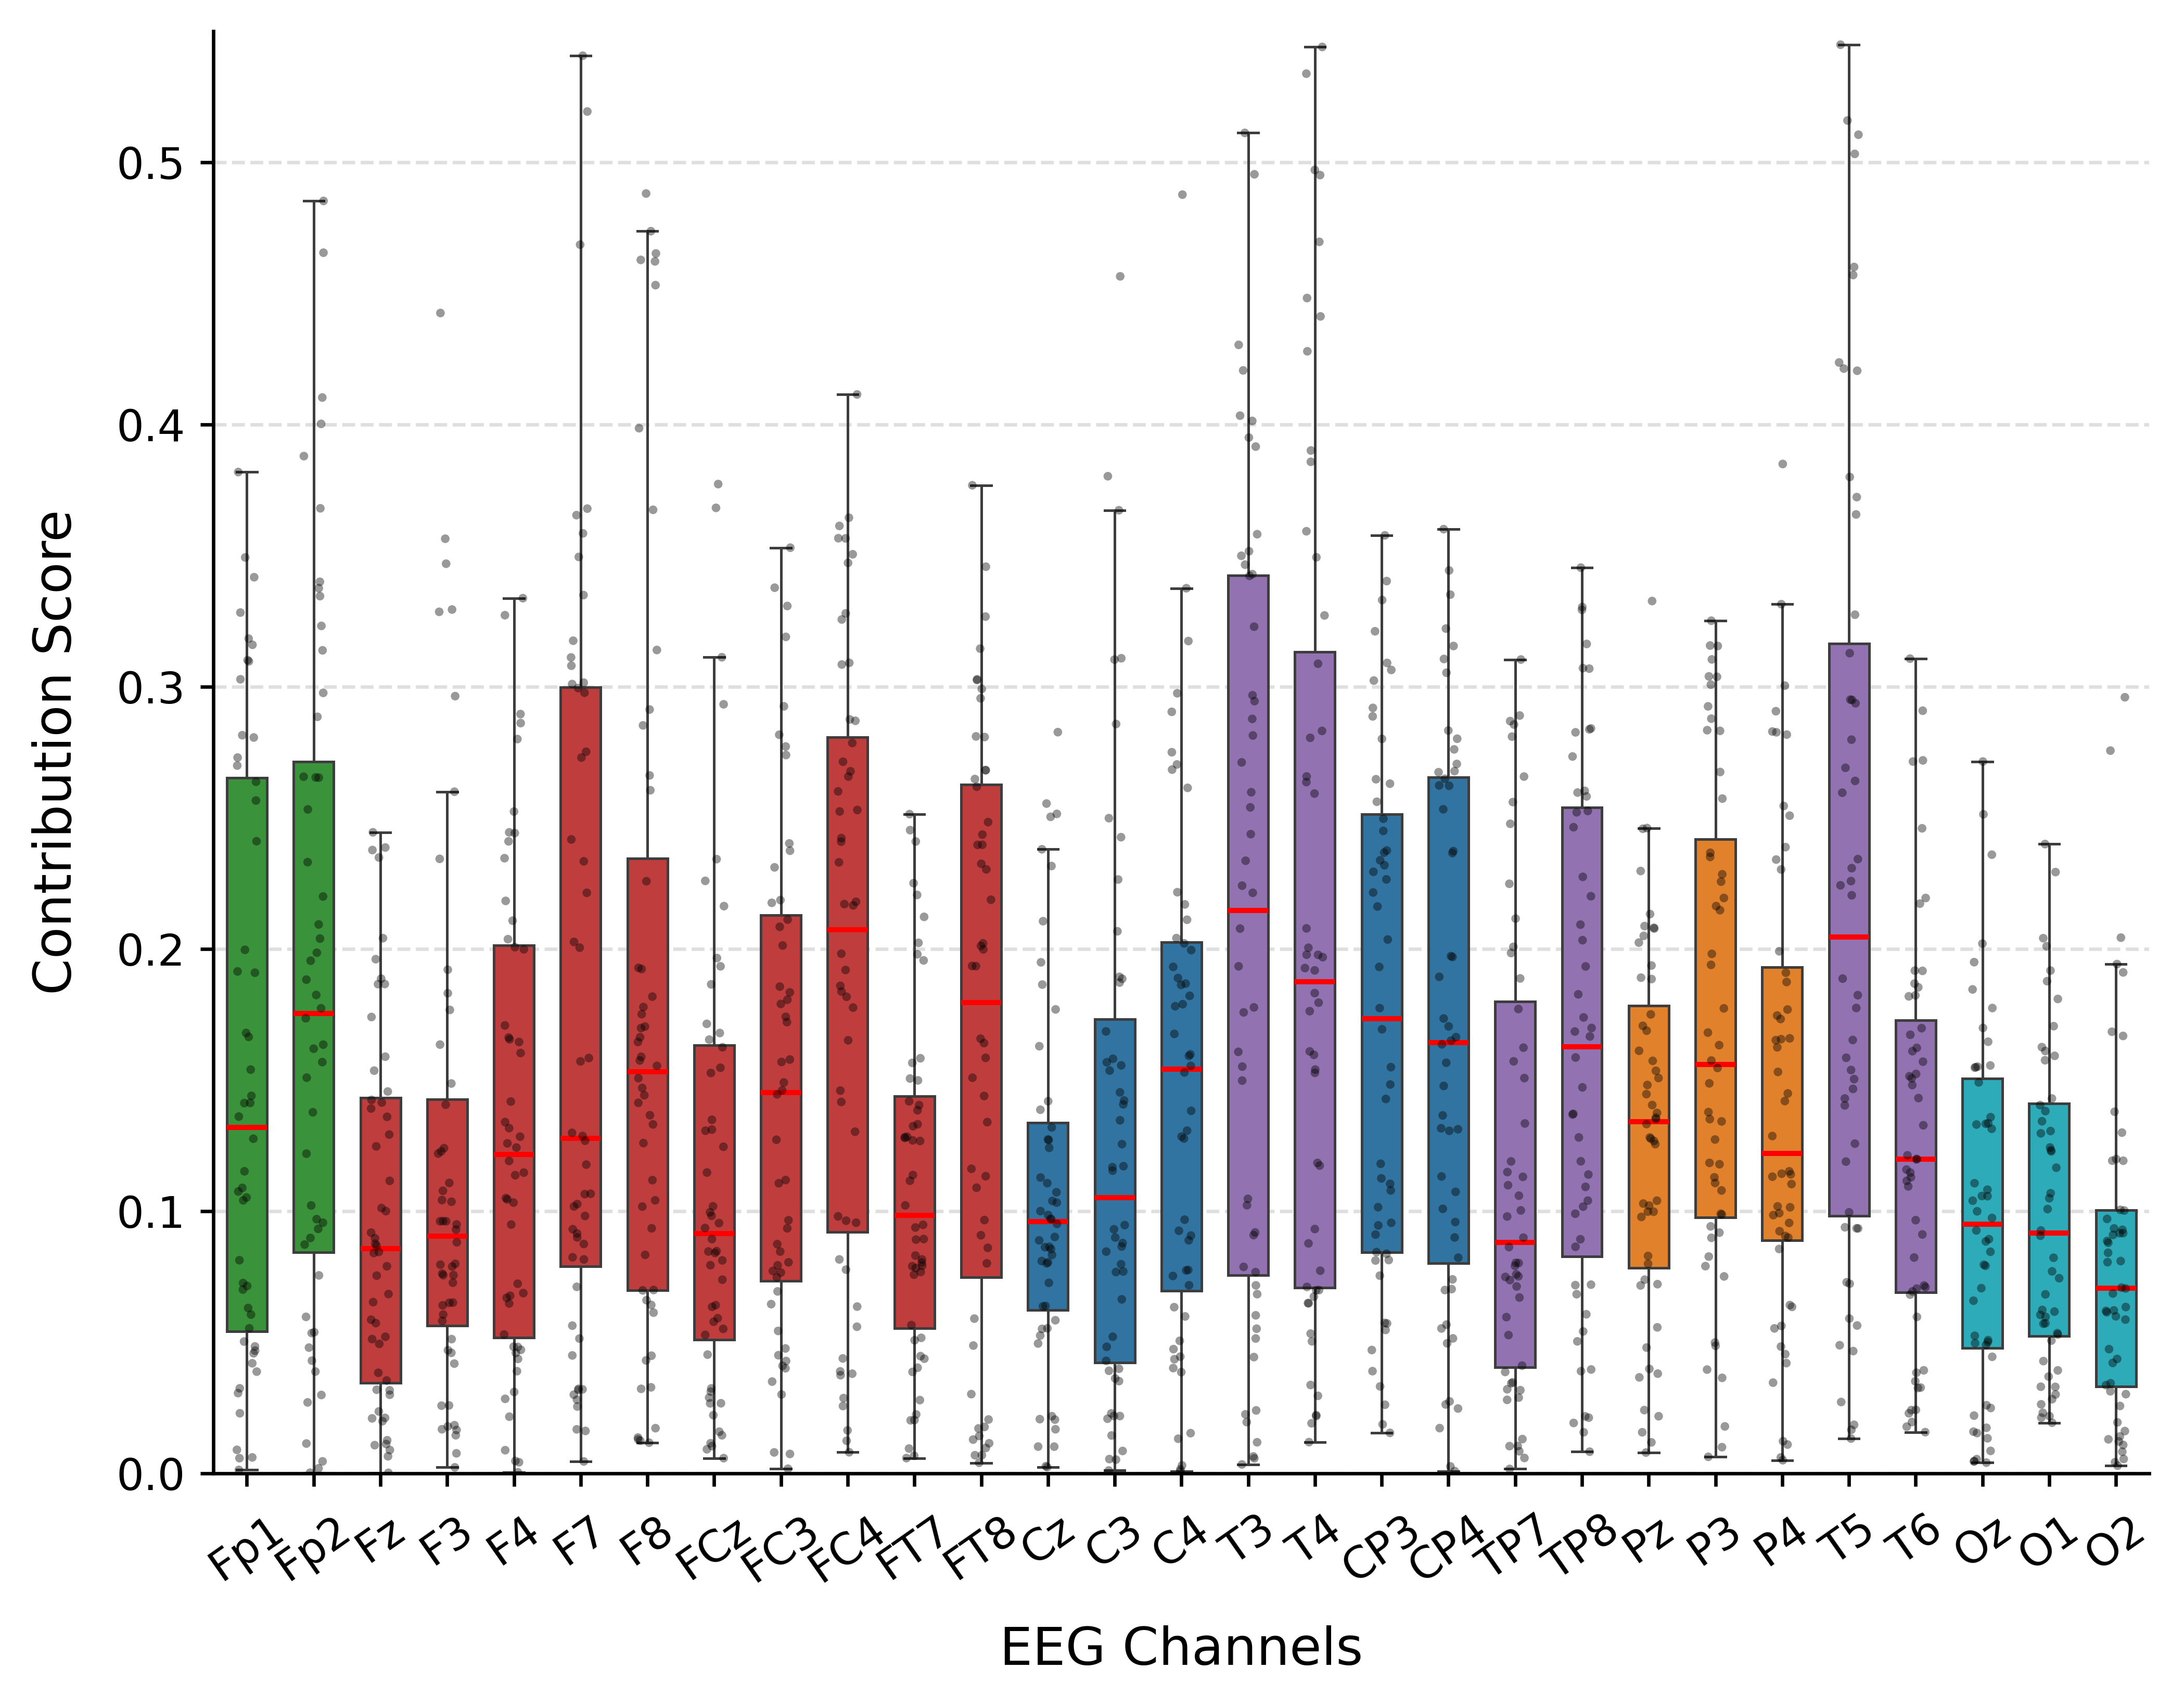

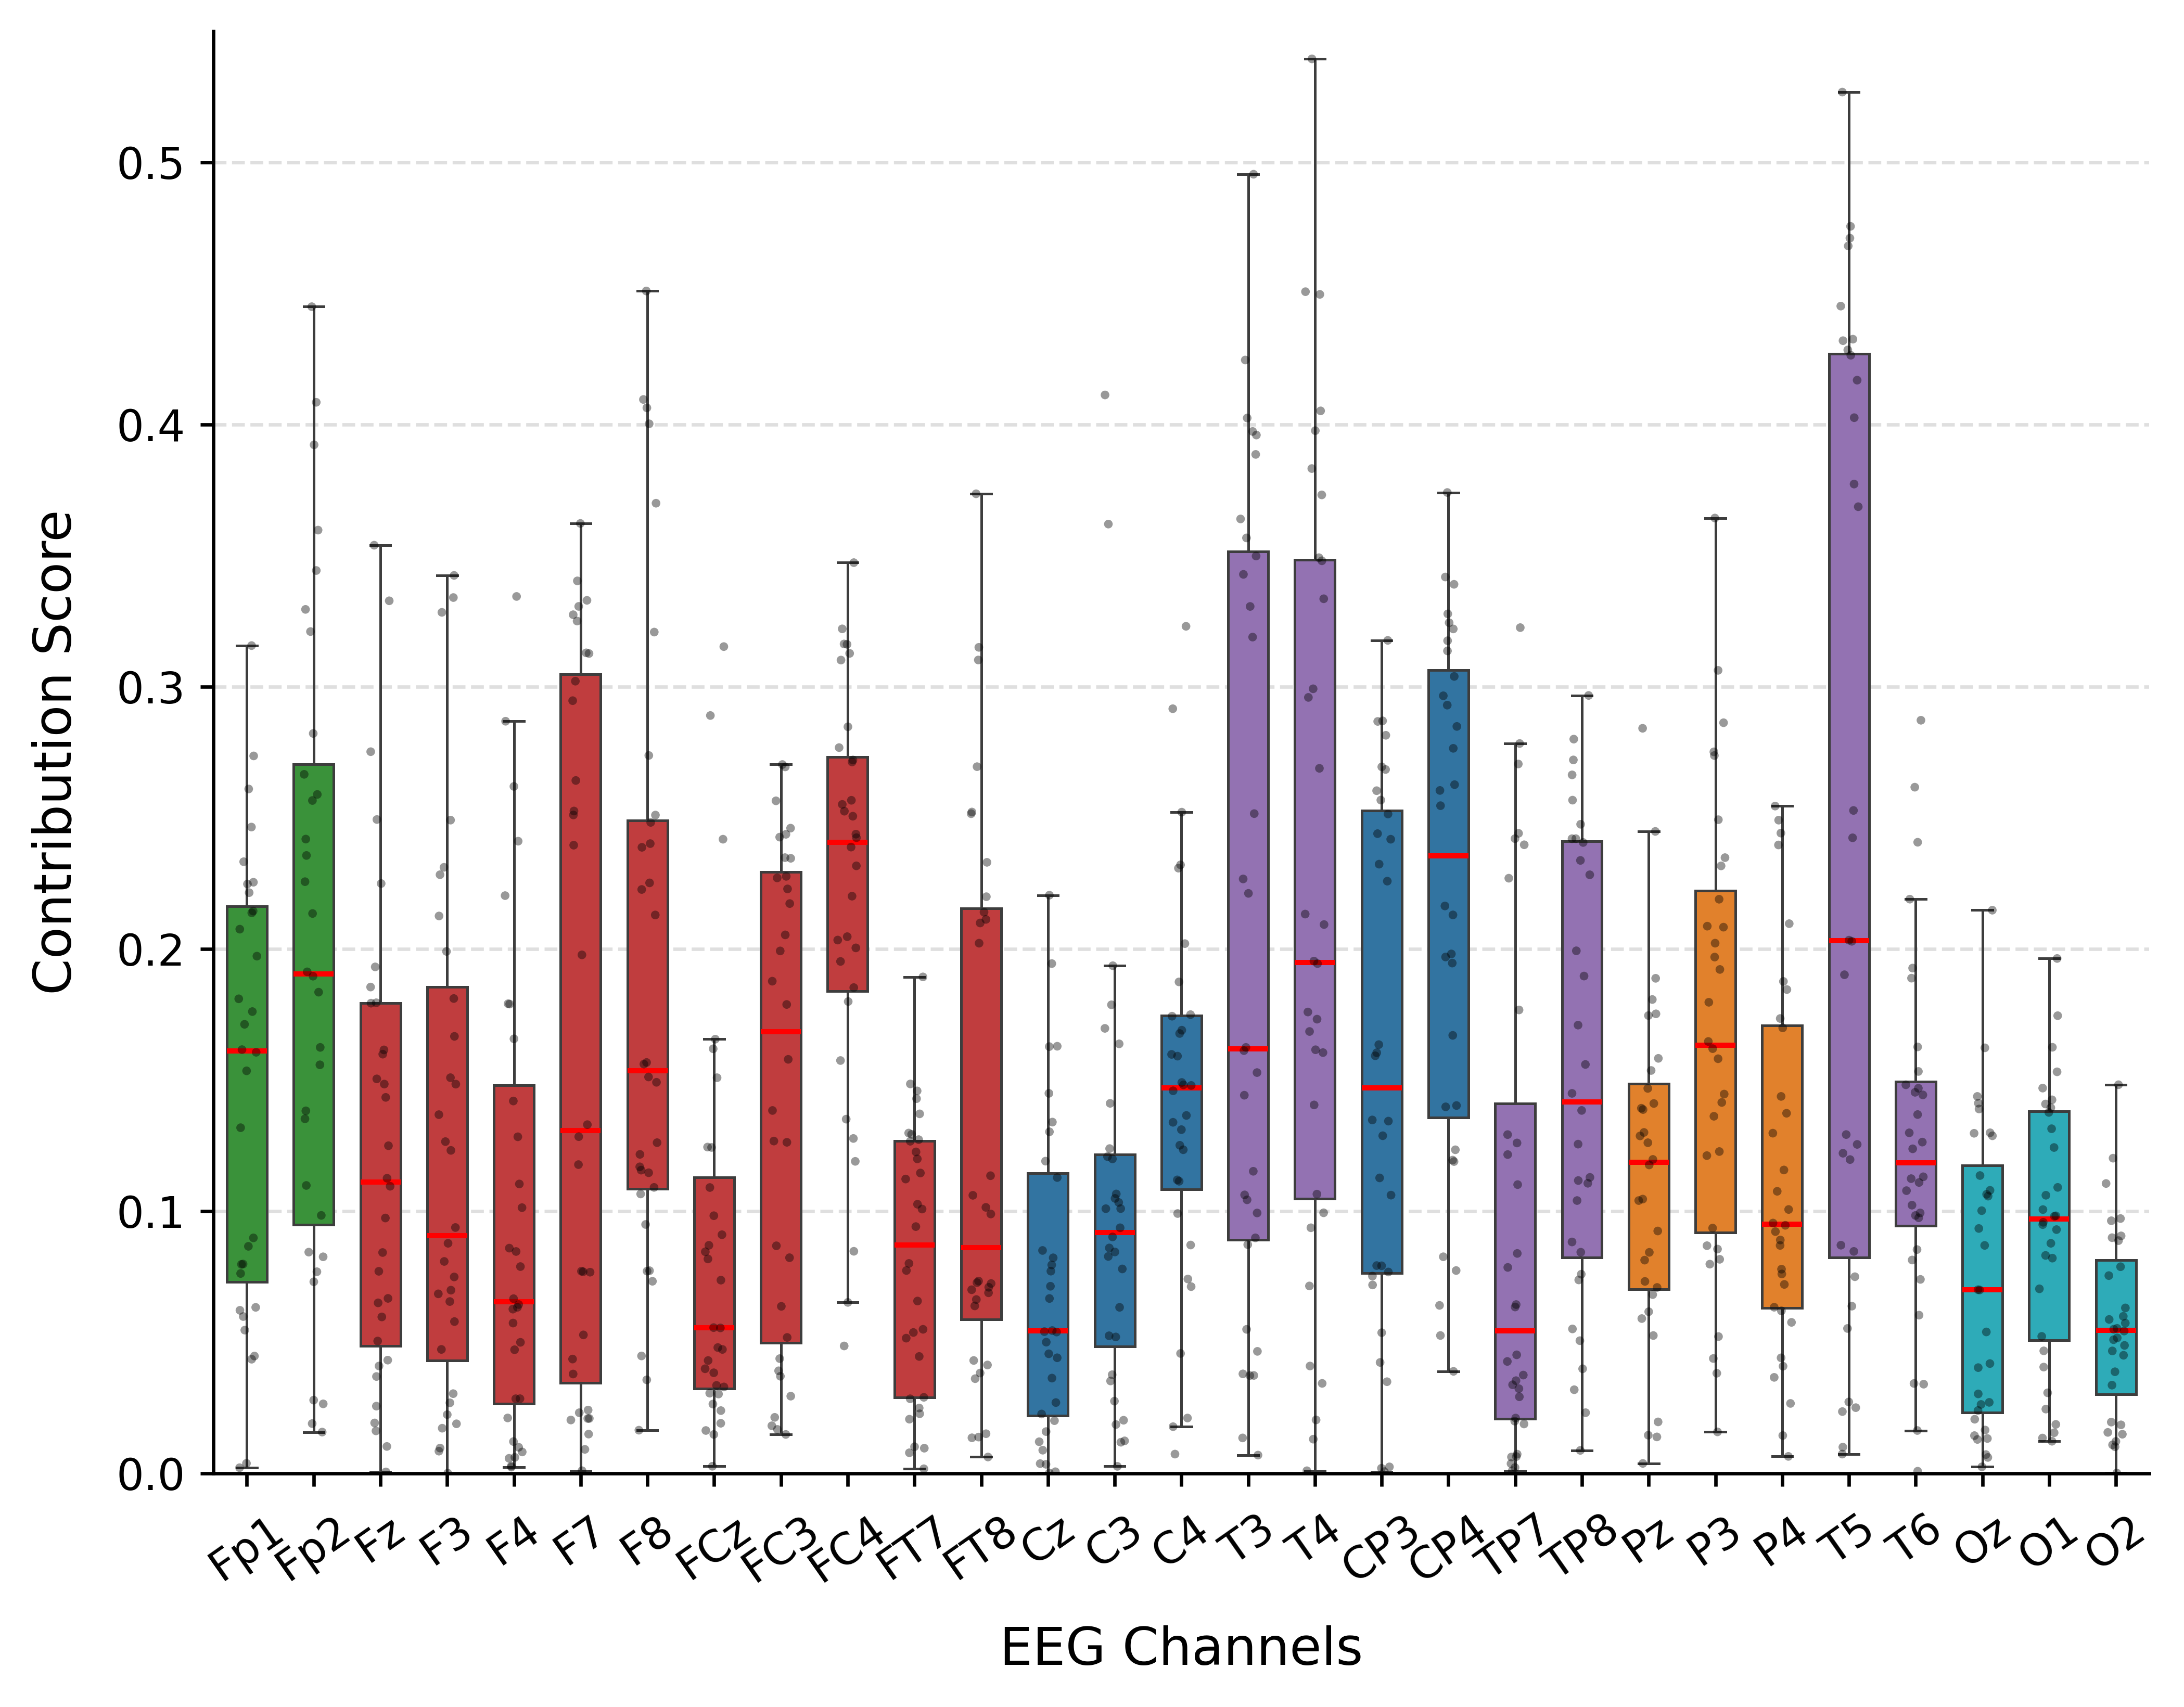

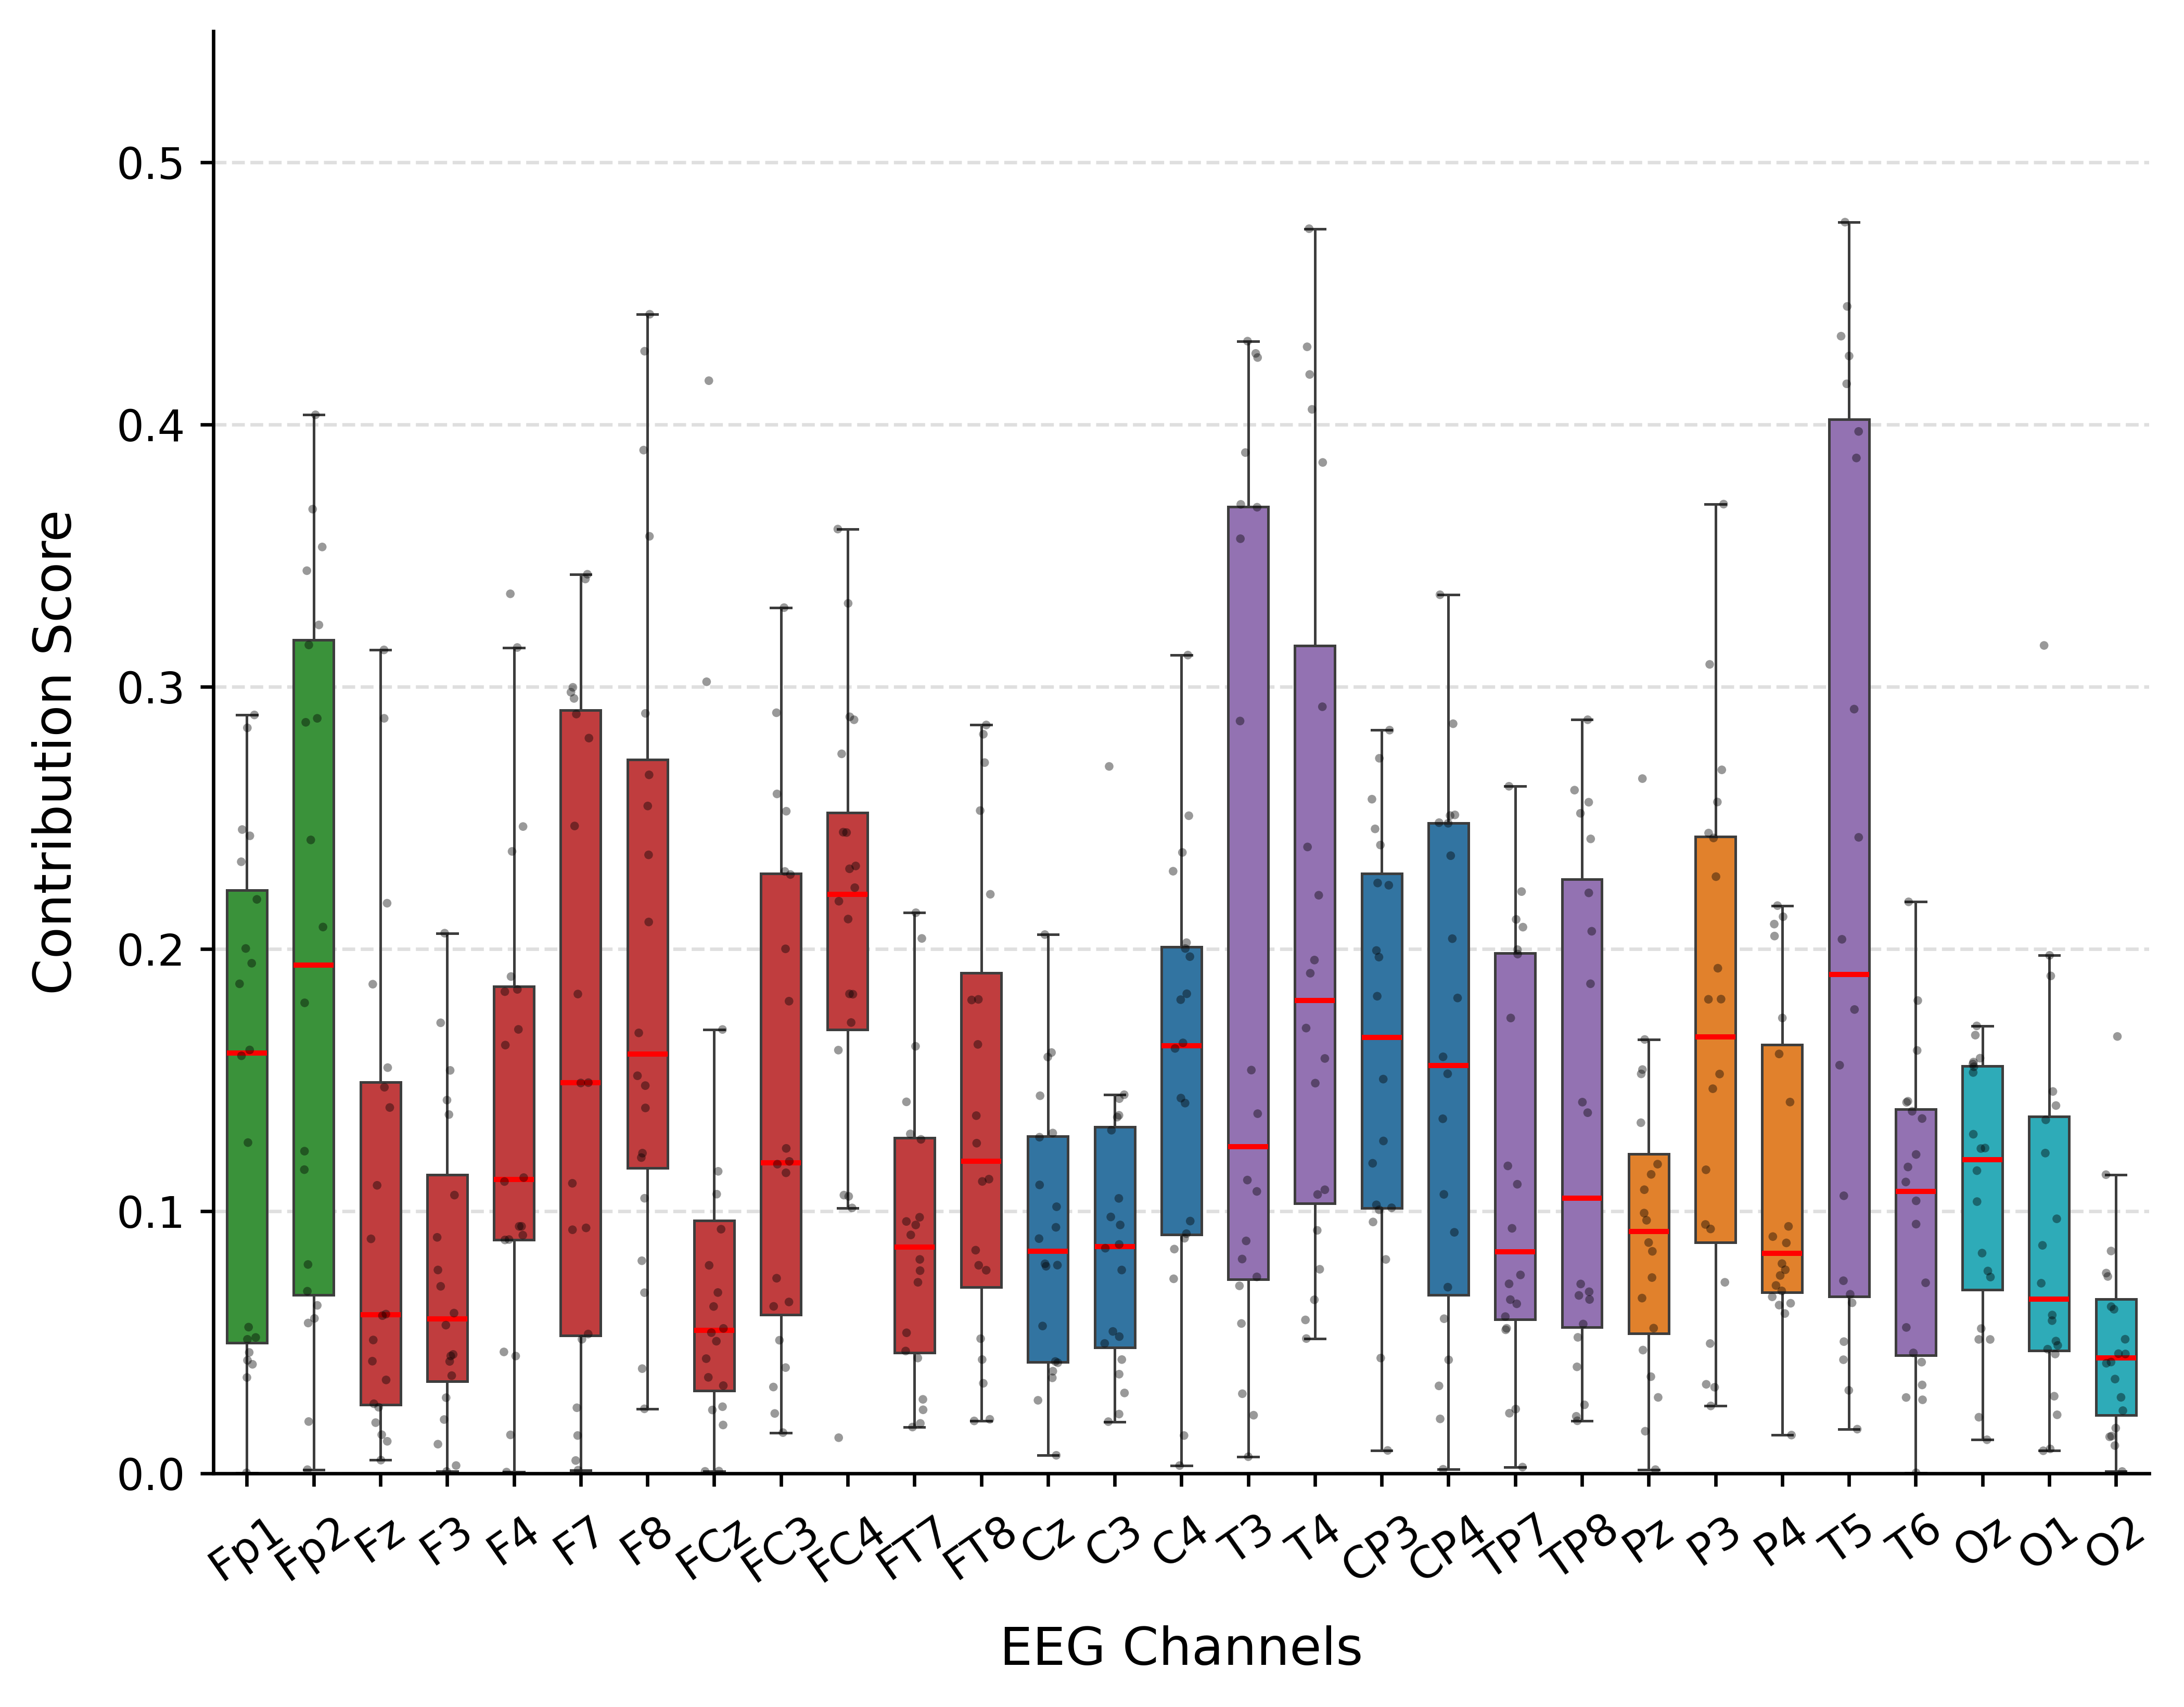

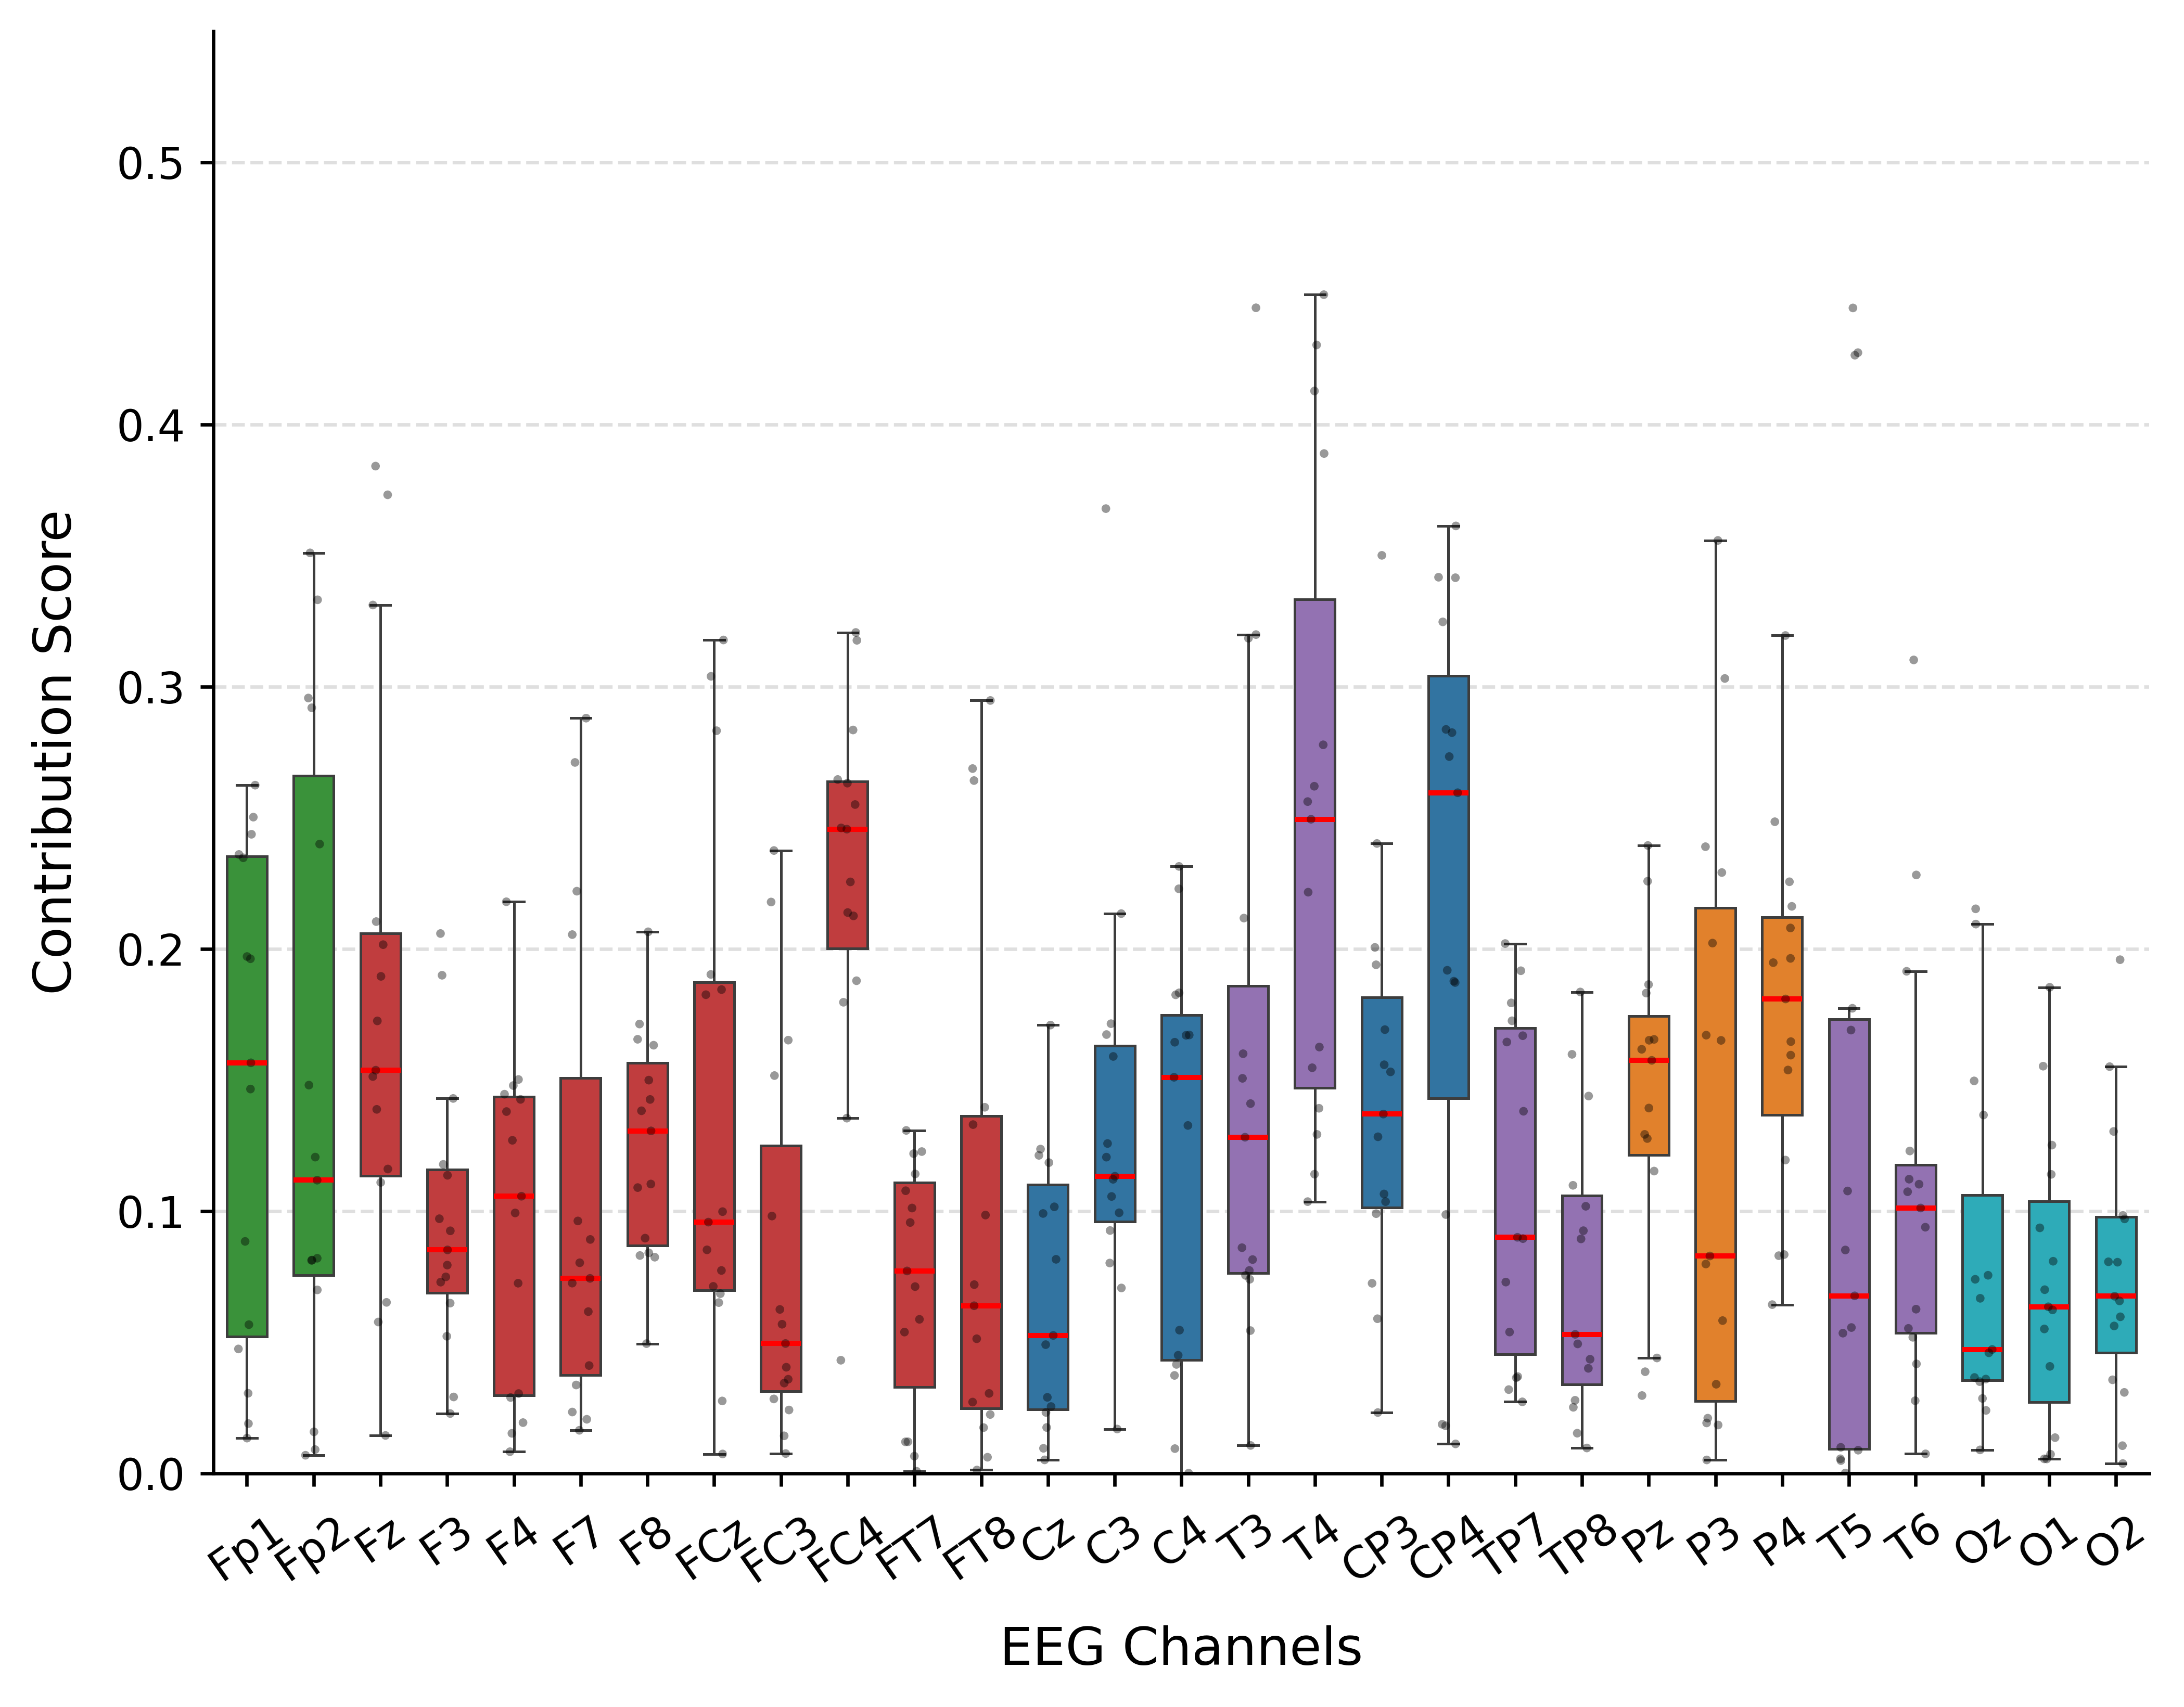

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import string
import seaborn as sns

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

data_for_plot = {"Region": [], "Contribution": [], "Sampling Rate": []}
for idx, spatial_regions in enumerate(spatial_regions_list_channel):
    sampling_rate_label = f"{string.ascii_uppercase[idx]}"
    for region, contributions in spatial_regions.items():
        data_for_plot["Region"].extend([region]*len(contributions))
        data_for_plot["Contribution"].extend(contributions)
        data_for_plot["Sampling Rate"].extend([sampling_rate_label]*len(contributions))
df = pd.DataFrame(data_for_plot)

for sampling_rate_label in df["Sampling Rate"].unique():
    fig, ax = plt.subplots(figsize=(8, 6))  
    subset_df = df[df["Sampling Rate"] == sampling_rate_label]
    
    boxprops = {'linewidth': 0.6}
    whiskerprops = {'linewidth': 0.6}
    capprops = {'linewidth': 0.6}
    medianprops = {'color': 'red', 'linewidth': 1.2}
    palette = {region: channel_colors.get(region, 'gray') for region in subset_df['Region'].unique()}
    
    sns.boxplot(
        x="Region",
        y="Contribution",
        data=subset_df,
        hue="Region",
        palette=palette,  
        width=0.6,
        showfliers=False,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        ax=ax
    )
    
    sns.stripplot(
        x="Region",
        y="Contribution",
        data=subset_df,
        color='black',
        size=2,
        alpha=0.4,
        jitter=0.15,
        edgecolor='none',
        ax=ax
    )
    
    ax.set_ylim(0, 0.55)
    ax.set_xlabel("EEG Channels", labelpad=8)
    ax.set_ylabel("Contribution Score", labelpad=8)
    ax.tick_params(axis='x', rotation=35, length=3, pad=5)
    ax.tick_params(axis='y', length=3)
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig(f'figure/supp_2{sampling_rate_label}.tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
    plt.show()
    plt.close()

supp figure 2E-H

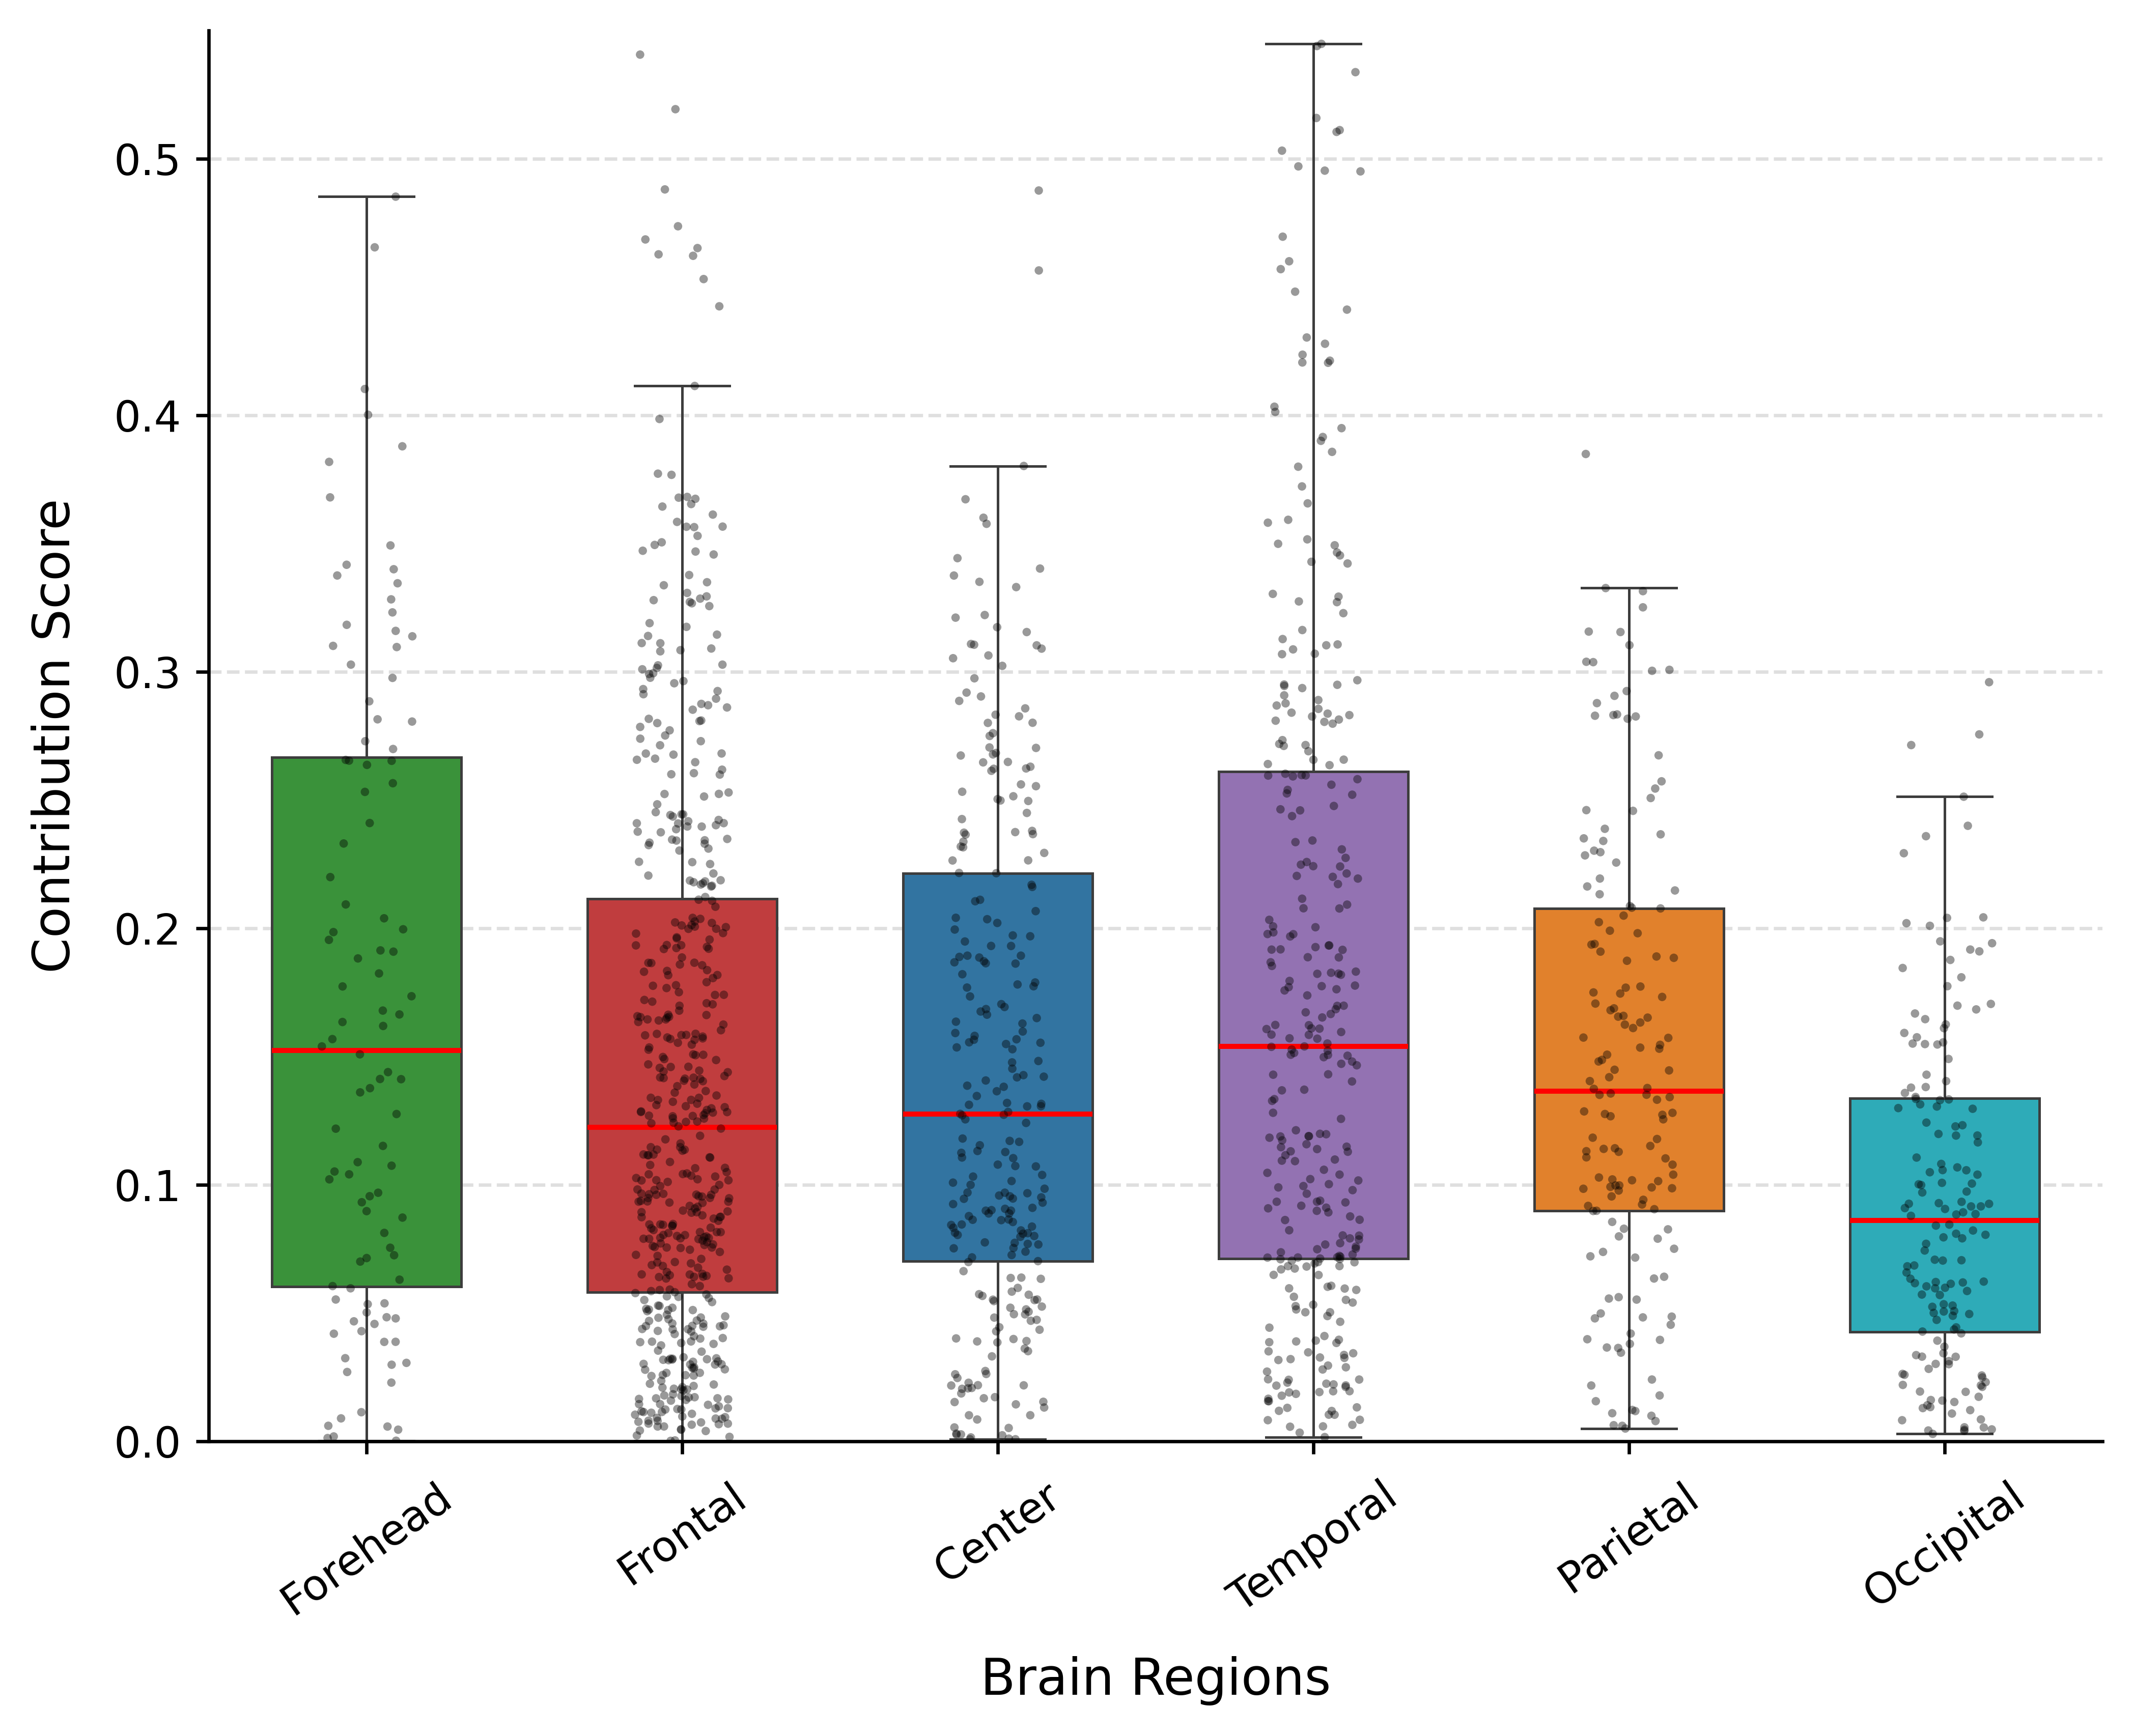

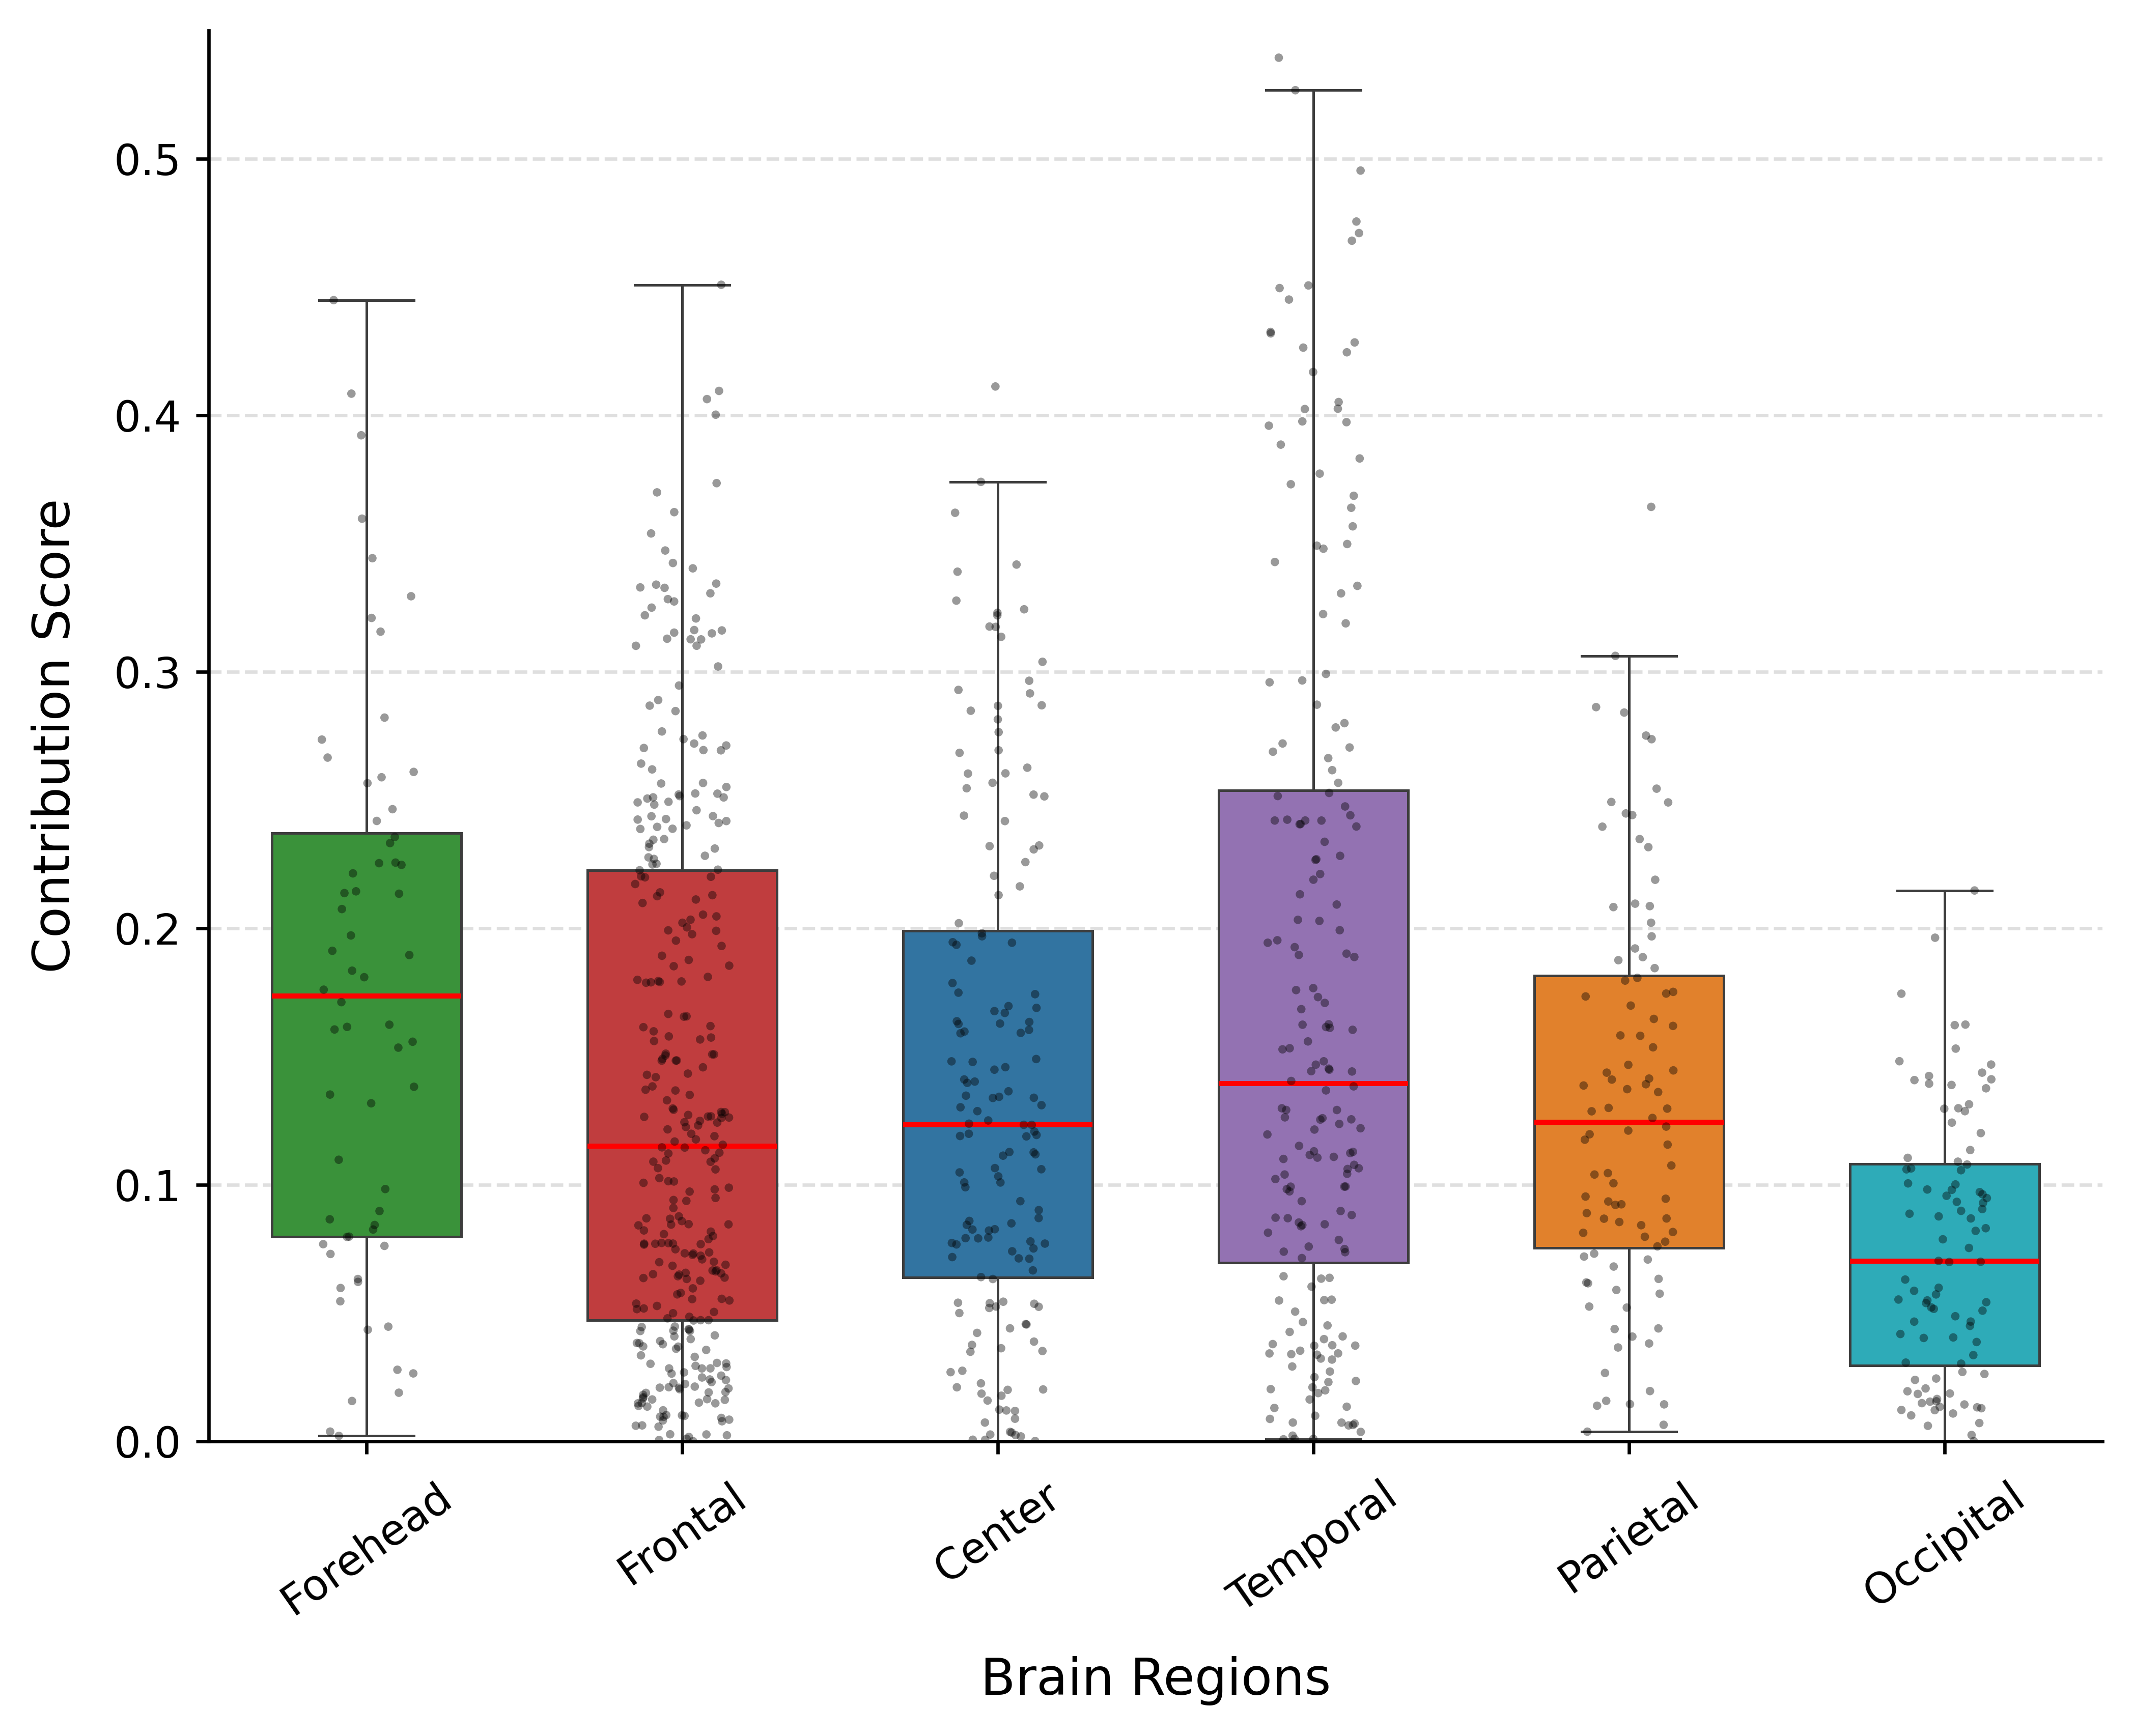

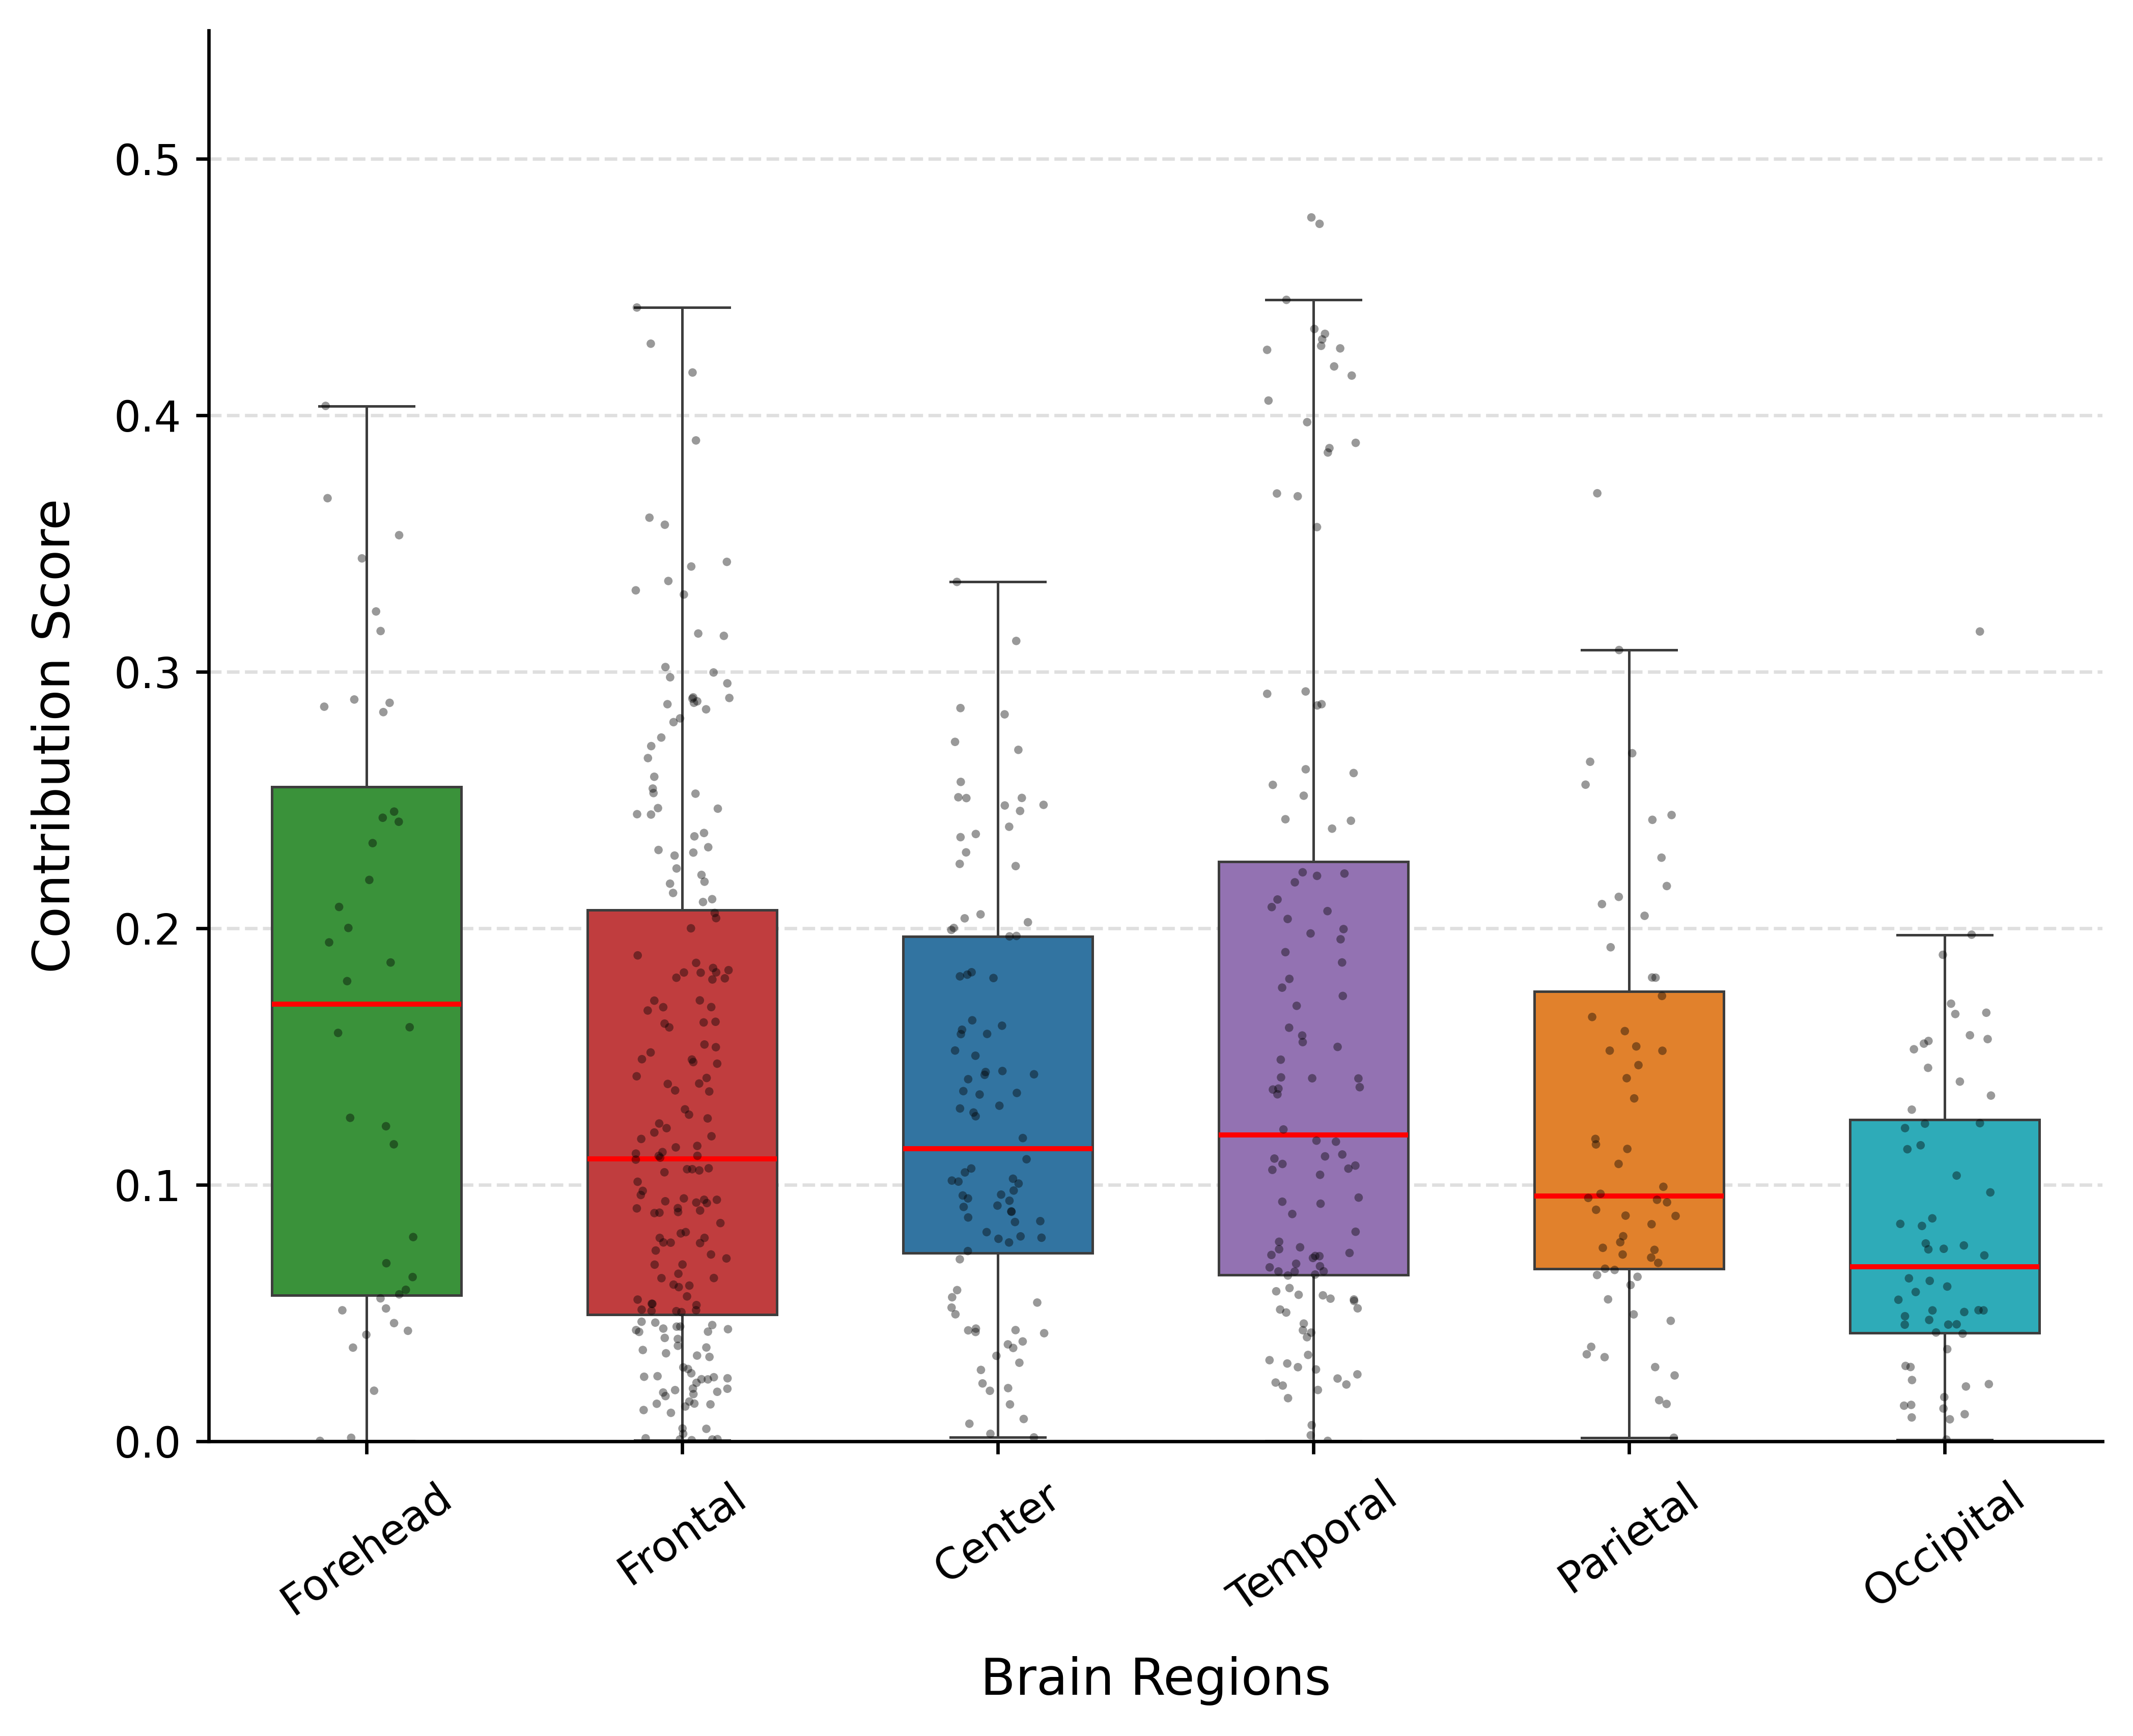

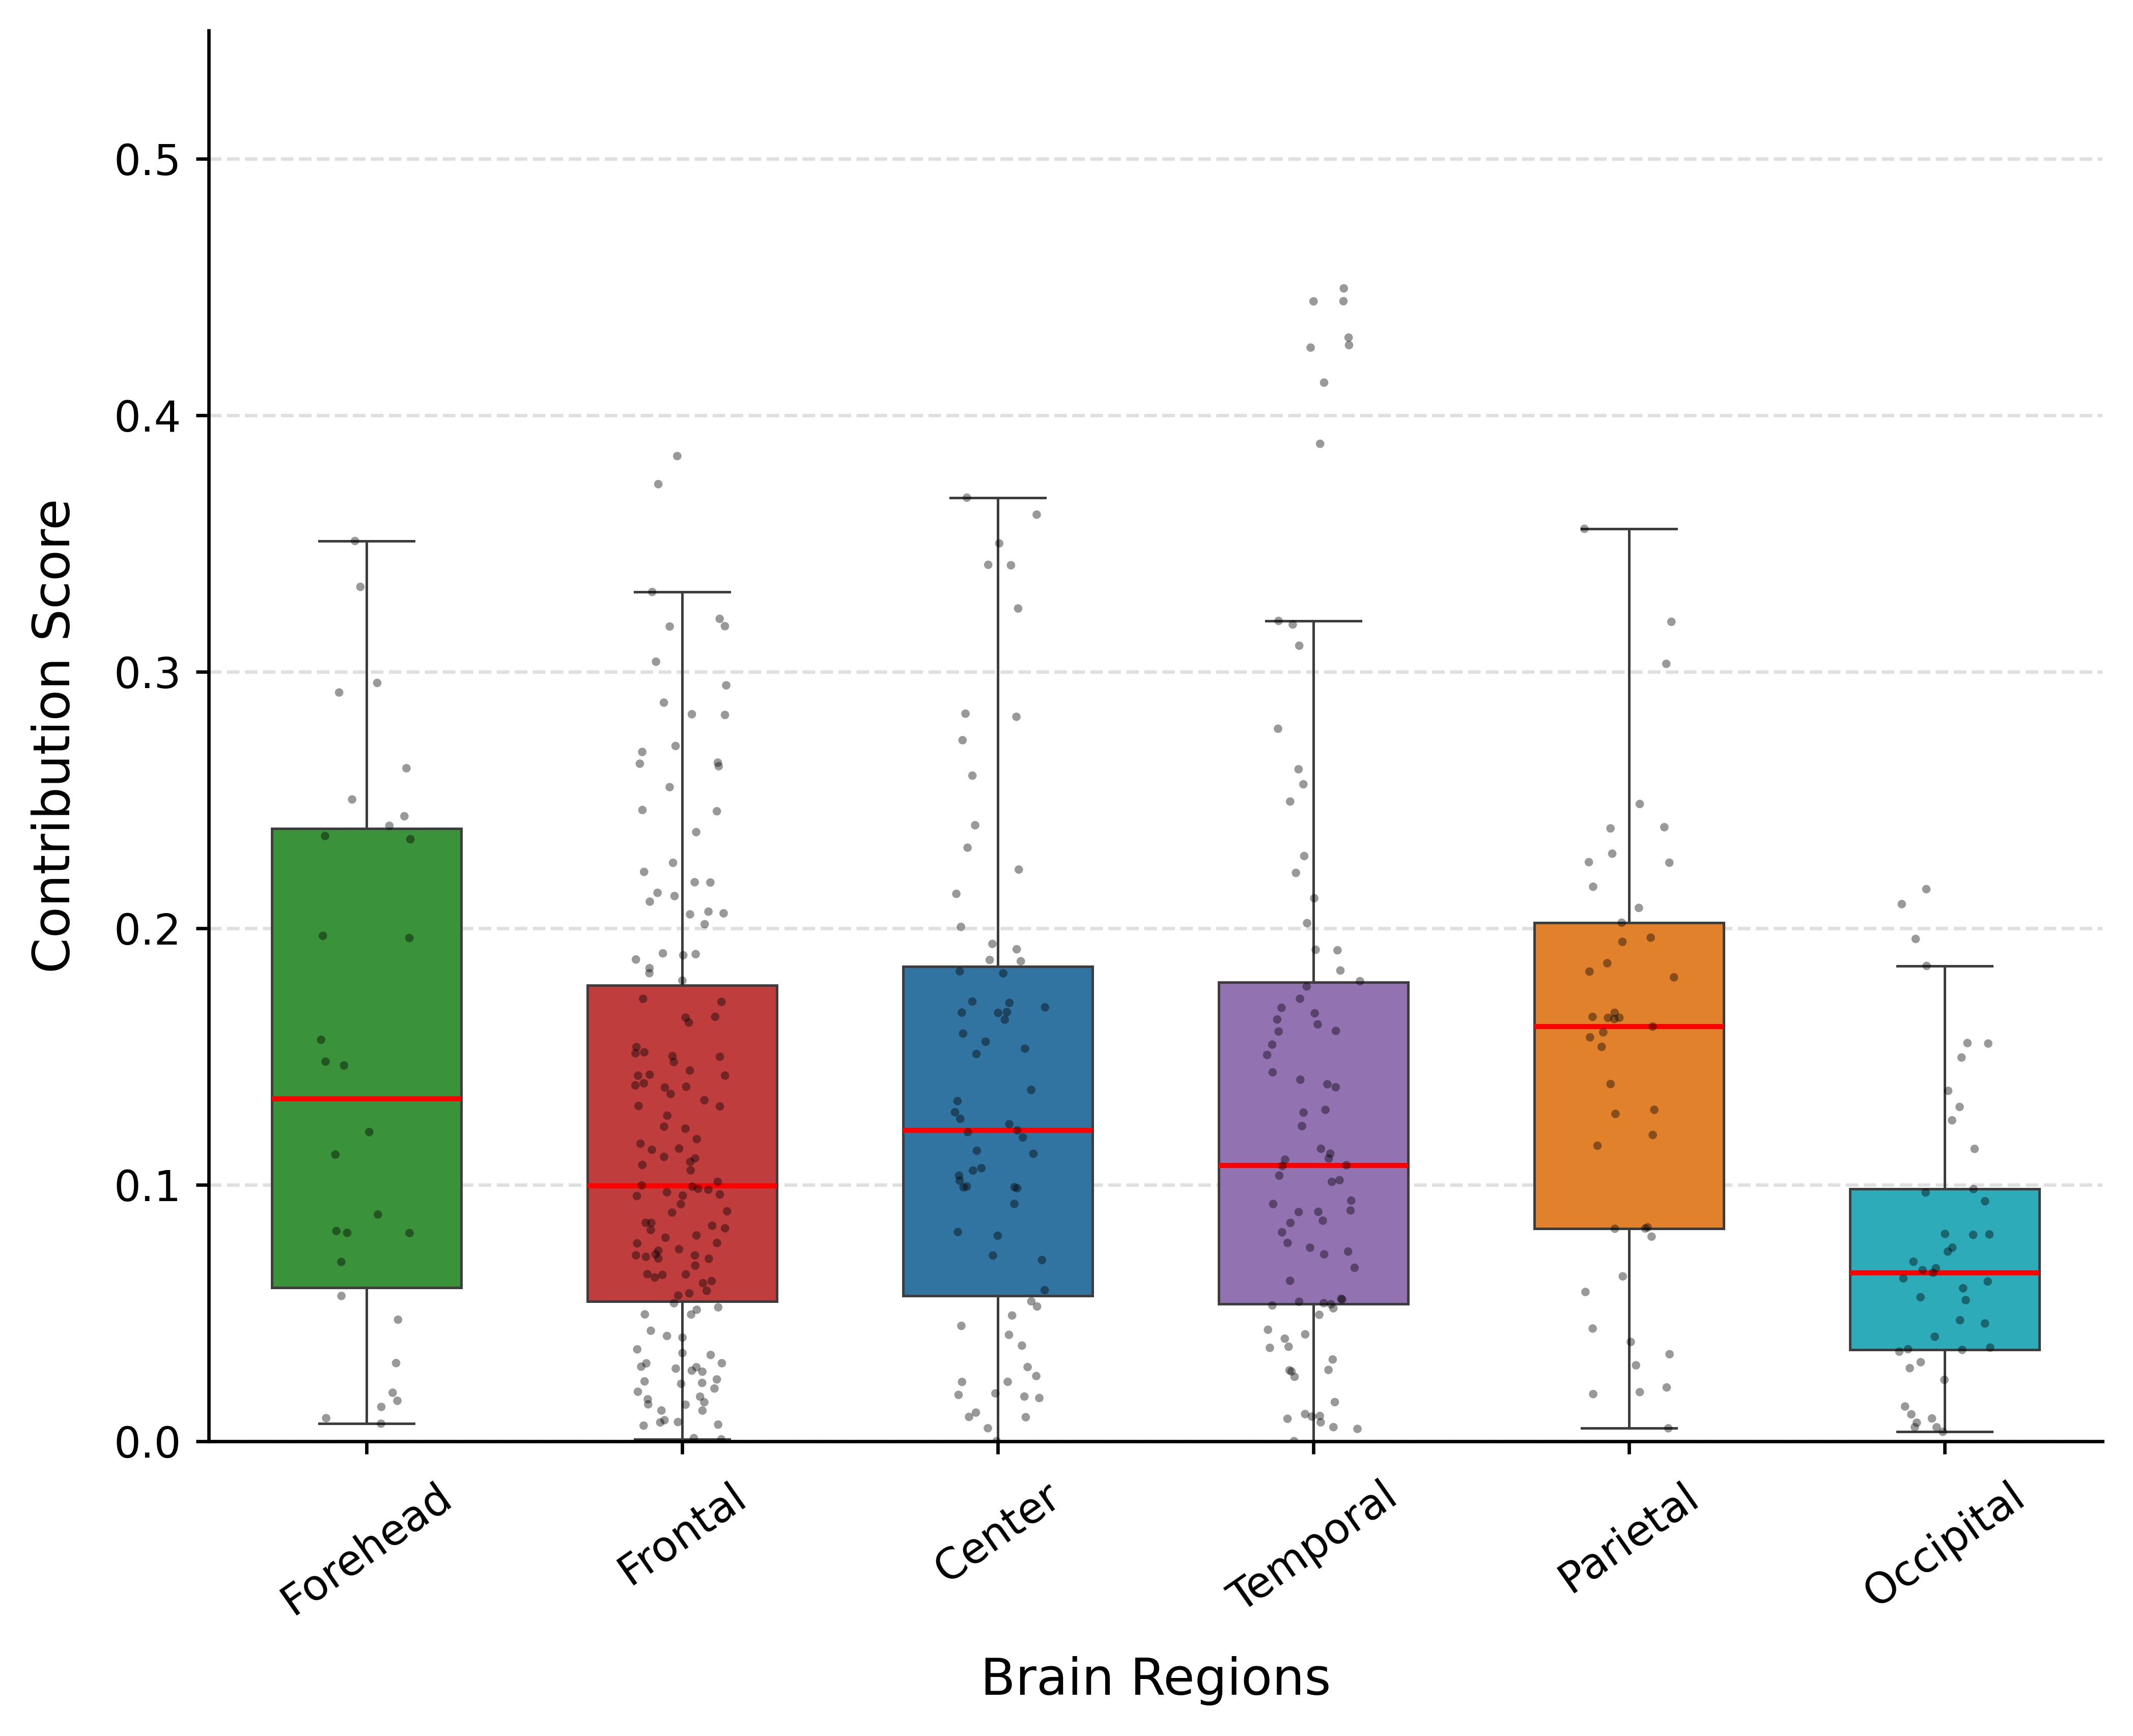

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import string
import seaborn as sns

plt.rcParams.update({
    'font.family': 'DejaVu Sans',  
    'font.size': 10,         
    'axes.labelsize': 12,    
    'axes.titlesize': 14,    
    'xtick.labelsize': 10,   
    'ytick.labelsize': 10,  
    'legend.fontsize': 10,  
    'figure.dpi': 300,       
    'savefig.dpi': 300,    
    'pdf.fonttype': 42,    
    'ps.fonttype': 42      
})

data_for_plot = {"Region": [], "Contribution": [], "Sampling Rate": []}
for idx, spatial_regions in enumerate(spatial_regions_list_region):
    sampling_rate_label = f"{string.ascii_uppercase[idx+4]}"
    for region, contributions in spatial_regions.items():
        data_for_plot["Region"].extend([region]*len(contributions))
        data_for_plot["Contribution"].extend(contributions)
        data_for_plot["Sampling Rate"].extend([sampling_rate_label]*len(contributions))
df = pd.DataFrame(data_for_plot)

for sampling_rate_label in df["Sampling Rate"].unique():
    fig, ax = plt.subplots(figsize=(8, 6))  
    subset_df = df[df["Sampling Rate"] == sampling_rate_label]

    boxprops = {'linewidth': 0.6}
    whiskerprops = {'linewidth': 0.6}
    capprops = {'linewidth': 0.6}
    medianprops = {'color': 'red', 'linewidth': 1.2}
    palette = {region: region_colors.get(region, 'gray') for region in subset_df['Region'].unique()}

    sns.boxplot(
        x="Region",
        y="Contribution",
        data=subset_df,
        palette=palette,
        hue ="Region",
        width=0.6,
        showfliers=False,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        ax=ax
    )
    
    sns.stripplot(
        x="Region",
        y="Contribution",
        data=subset_df,
        color='black',
        size=2,
        alpha=0.4,
        jitter=0.15,
        edgecolor='none',
        ax=ax
    )
    
    ax.set_ylim(0, 0.55)
    ax.set_xlabel("Brain Regions", labelpad=8)
    ax.set_ylabel("Contribution Score", labelpad=8)
    ax.tick_params(axis='x', rotation=35, length=3, pad=5)
    ax.tick_params(axis='y', length=3)
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # # 统计标注（ANOVA结果）
    # regions = subset_df["Region"].unique()
    # contributions = [subset_df[subset_df["Region"] == r]["Contribution"] for r in regions]
    # f_val, p_val = stats.f_oneway(*contributions)
    # ax.text(0.95, 0.92, 
    #         f'ANOVA p={p_val:.2e}',
    #         transform=ax.transAxes,
    #         ha='right',
    #         va='top',
    #         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.savefig(f'figure/supp_2{sampling_rate_label}.tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
    plt.show()
    plt.close()